In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-01 07:40:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-01 07:40:58 (13.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [43]:
data = pd.read_csv('moore.csv', header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [44]:
data = data.values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

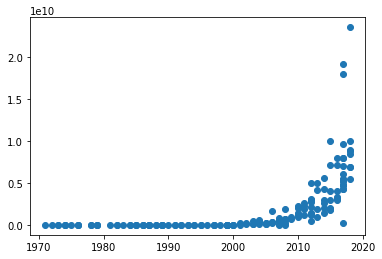

In [45]:
plt.scatter(X, Y);

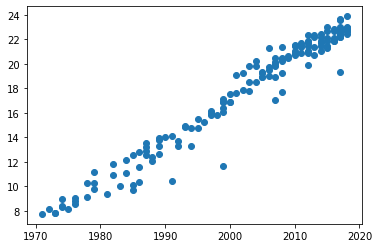

In [46]:
Y = np.log(Y)
plt.scatter(X, Y);

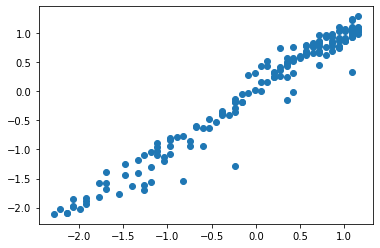

In [47]:
mean_x, std_x = X.mean(), X.std()
mean_y, std_y = Y.mean(), Y.std()
X = (X - mean_x) / std_x
Y = (Y - mean_y) / std_y
plt.scatter(X, Y);

In [48]:
# Cast to float32 for PyTorch
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [49]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [50]:
# Setup loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.7)

In [51]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [52]:
type(inputs)

torch.Tensor

In [53]:
num_epochs = 100
losses = []
for i in range(num_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {i+1} / {num_epochs}, Loss: {loss.item():.4f}")

Epoch 1 / 100, Loss: 0.6113
Epoch 2 / 100, Loss: 0.4051
Epoch 3 / 100, Loss: 0.1817
Epoch 4 / 100, Loss: 0.0592
Epoch 5 / 100, Loss: 0.0409
Epoch 6 / 100, Loss: 0.0689
Epoch 7 / 100, Loss: 0.0901
Epoch 8 / 100, Loss: 0.0863
Epoch 9 / 100, Loss: 0.0671
Epoch 10 / 100, Loss: 0.0486
Epoch 11 / 100, Loss: 0.0395
Epoch 12 / 100, Loss: 0.0390
Epoch 13 / 100, Loss: 0.0415
Epoch 14 / 100, Loss: 0.0431
Epoch 15 / 100, Loss: 0.0424
Epoch 16 / 100, Loss: 0.0407
Epoch 17 / 100, Loss: 0.0392
Epoch 18 / 100, Loss: 0.0385
Epoch 19 / 100, Loss: 0.0386
Epoch 20 / 100, Loss: 0.0388
Epoch 21 / 100, Loss: 0.0389
Epoch 22 / 100, Loss: 0.0388
Epoch 23 / 100, Loss: 0.0386
Epoch 24 / 100, Loss: 0.0385
Epoch 25 / 100, Loss: 0.0385
Epoch 26 / 100, Loss: 0.0385
Epoch 27 / 100, Loss: 0.0385
Epoch 28 / 100, Loss: 0.0385
Epoch 29 / 100, Loss: 0.0385
Epoch 30 / 100, Loss: 0.0385
Epoch 31 / 100, Loss: 0.0385
Epoch 32 / 100, Loss: 0.0385
Epoch 33 / 100, Loss: 0.0385
Epoch 34 / 100, Loss: 0.0385
Epoch 35 / 100, Loss: 0

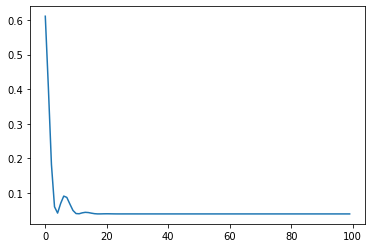

In [54]:
plt.plot(losses);

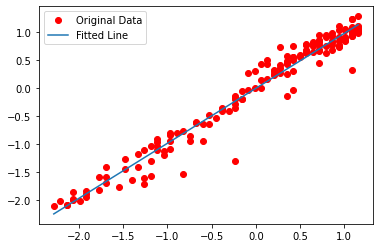

In [55]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label="Original Data")
plt.plot(X, predicted, label="Fitted Line")
plt.legend();

In [56]:
w = model.weight.data.numpy()
w

array([[0.9805711]], dtype=float32)